In [1]:
import os
from classy import Class
from matplotlib import pyplot as plt
from getdist import plots, MCSamples
import getdist
from fit_test import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [20, 12]

2023-11-15 21:37:27.359331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/cuba
2023-11-15 21:37:27.359356: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dir_LRG = '/home/rneveux/fit_results/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/'
dir_ELG = '/home/rneveux/fit_results/FirstGenMocks_AbacusSummit/CubicBox/ELG/z1.100/'

In [3]:
pk02_max_free_v25 = np.load(os.path.join(dir_LRG,'Pk_0_2_kmin2_kmax25_rescaled25_all_biases_maximal_freedom_nersc_data.npy'),allow_pickle=True).item()
pk02_min_free = np.load(os.path.join(dir_LRG,'Pk_0_2_prior_wb_no_ns_kmin2_kmax18_all_minimal_freedom.npy'),allow_pickle=True).item()


In [4]:
pk02_max_free_v25.keys()

dict_keys(['k_edges', 'k', 'sampler', 'max_logposterior', 'params_fit_sorted', 'prior', 'mean', 'std', 'max_a_posteriori'])

In [5]:
params = {}
for cos in ['omega_cdm', 'omega_b', 'h', 'n_s', 'ln10^{10}A_s']:
    params[cos] = pk02_max_free_v25['prior'][cos]['lim'][0]
bb = ['b1','b2','bG2','bGamma3','c0','c1','ch','Pshot','a0',]
for i,j in enumerate(bb):
    params[j] = pk02_max_free_v25['max_logposterior'][i]

In [6]:
gg = matry.Growth()

2023-11-08 17:48:43.157342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/cuba
2023-11-08 17:48:43.157404: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-08 17:48:43.157446: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (worker085): /proc/driver/nvidia/version does not exist
2023-11-08 17:48:43.157971: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
data_dir = '/home/rneveux/mocks/DESI/cubicbox_abacus_LRG/'
name_file = {
        'Pk':{0:os.path.join(data_dir,'pk0_CubicBox_rsd_phmean_kpk'),
             2:os.path.join(data_dir,'pk2_CubicBox_rsd_phmean_kpk'),
             4:os.path.join(data_dir,'pk4_CubicBox_rsd_phmean_kpk'),}}
data = {i: np.loadtxt(name_file['Pk'][i]) for i in [0,2,4]}

In [8]:
mask = ((data[0][:,0]>.02) & (data[0][:,0]<.25))

In [9]:
k_model = np.linspace(.02,.26,500)
k_data = data[0][mask,0]
pk_model = {}
pk_model_kdata = {}
for ell in [0,2]:
    pk_model[ell] = pk_model_stand_alone(ell, mod='emulator', fz_compute='emulator', redshift=.8,
                                              mean_density=1e-3, k=k_model,Omfid=.31377,
                                              gg=gg, **params)
    pk_model_kdata[ell] = pk_model_stand_alone(ell, mod='emulator', fz_compute='emulator', redshift=.8,
                                              mean_density=1e-3, k=k_data,Omfid=.31377,
                                              gg=gg, **params)

In [11]:
cov = np.load('/home/rneveux/mocks/DESI/cubicbox_abacus_LRG/cov.npy',allow_pickle=True).item()
err = np.sqrt(np.diag(cov['cov']))
error = {}
for ell in [0,2]:
    error[ell] = err[int(100*ell/2):int(100*(ell/2+1))]
    error[ell] = error[ell][mask]

In [17]:
error[0]/5

array([503.13885641, 362.13417845, 282.41860909, 208.1427389 ,
       164.35331399, 133.9872701 , 108.63660127,  97.60273251,
        80.40140116,  73.75539278,  61.59988971,  53.06372425,
        43.27348326,  39.1224405 ,  34.58474831,  28.36813152,
        27.00862557,  23.66389495,  21.3056319 ,  19.59679578,
        18.53387539,  17.38029073,  15.55231267,  14.19967655,
        12.60967341,  11.85515986,  10.6188706 ,  10.15915056,
         9.19007152,   8.48671961,   8.06510126,   8.0159701 ,
         7.7492495 ,   6.99598034,   6.49787392,   5.91493192,
         5.76936936,   5.28835614,   5.01173043,   5.01452967,
         4.63335727,   4.42686002,   4.31905838,   3.85674903,
         3.64311094,   3.57396654])

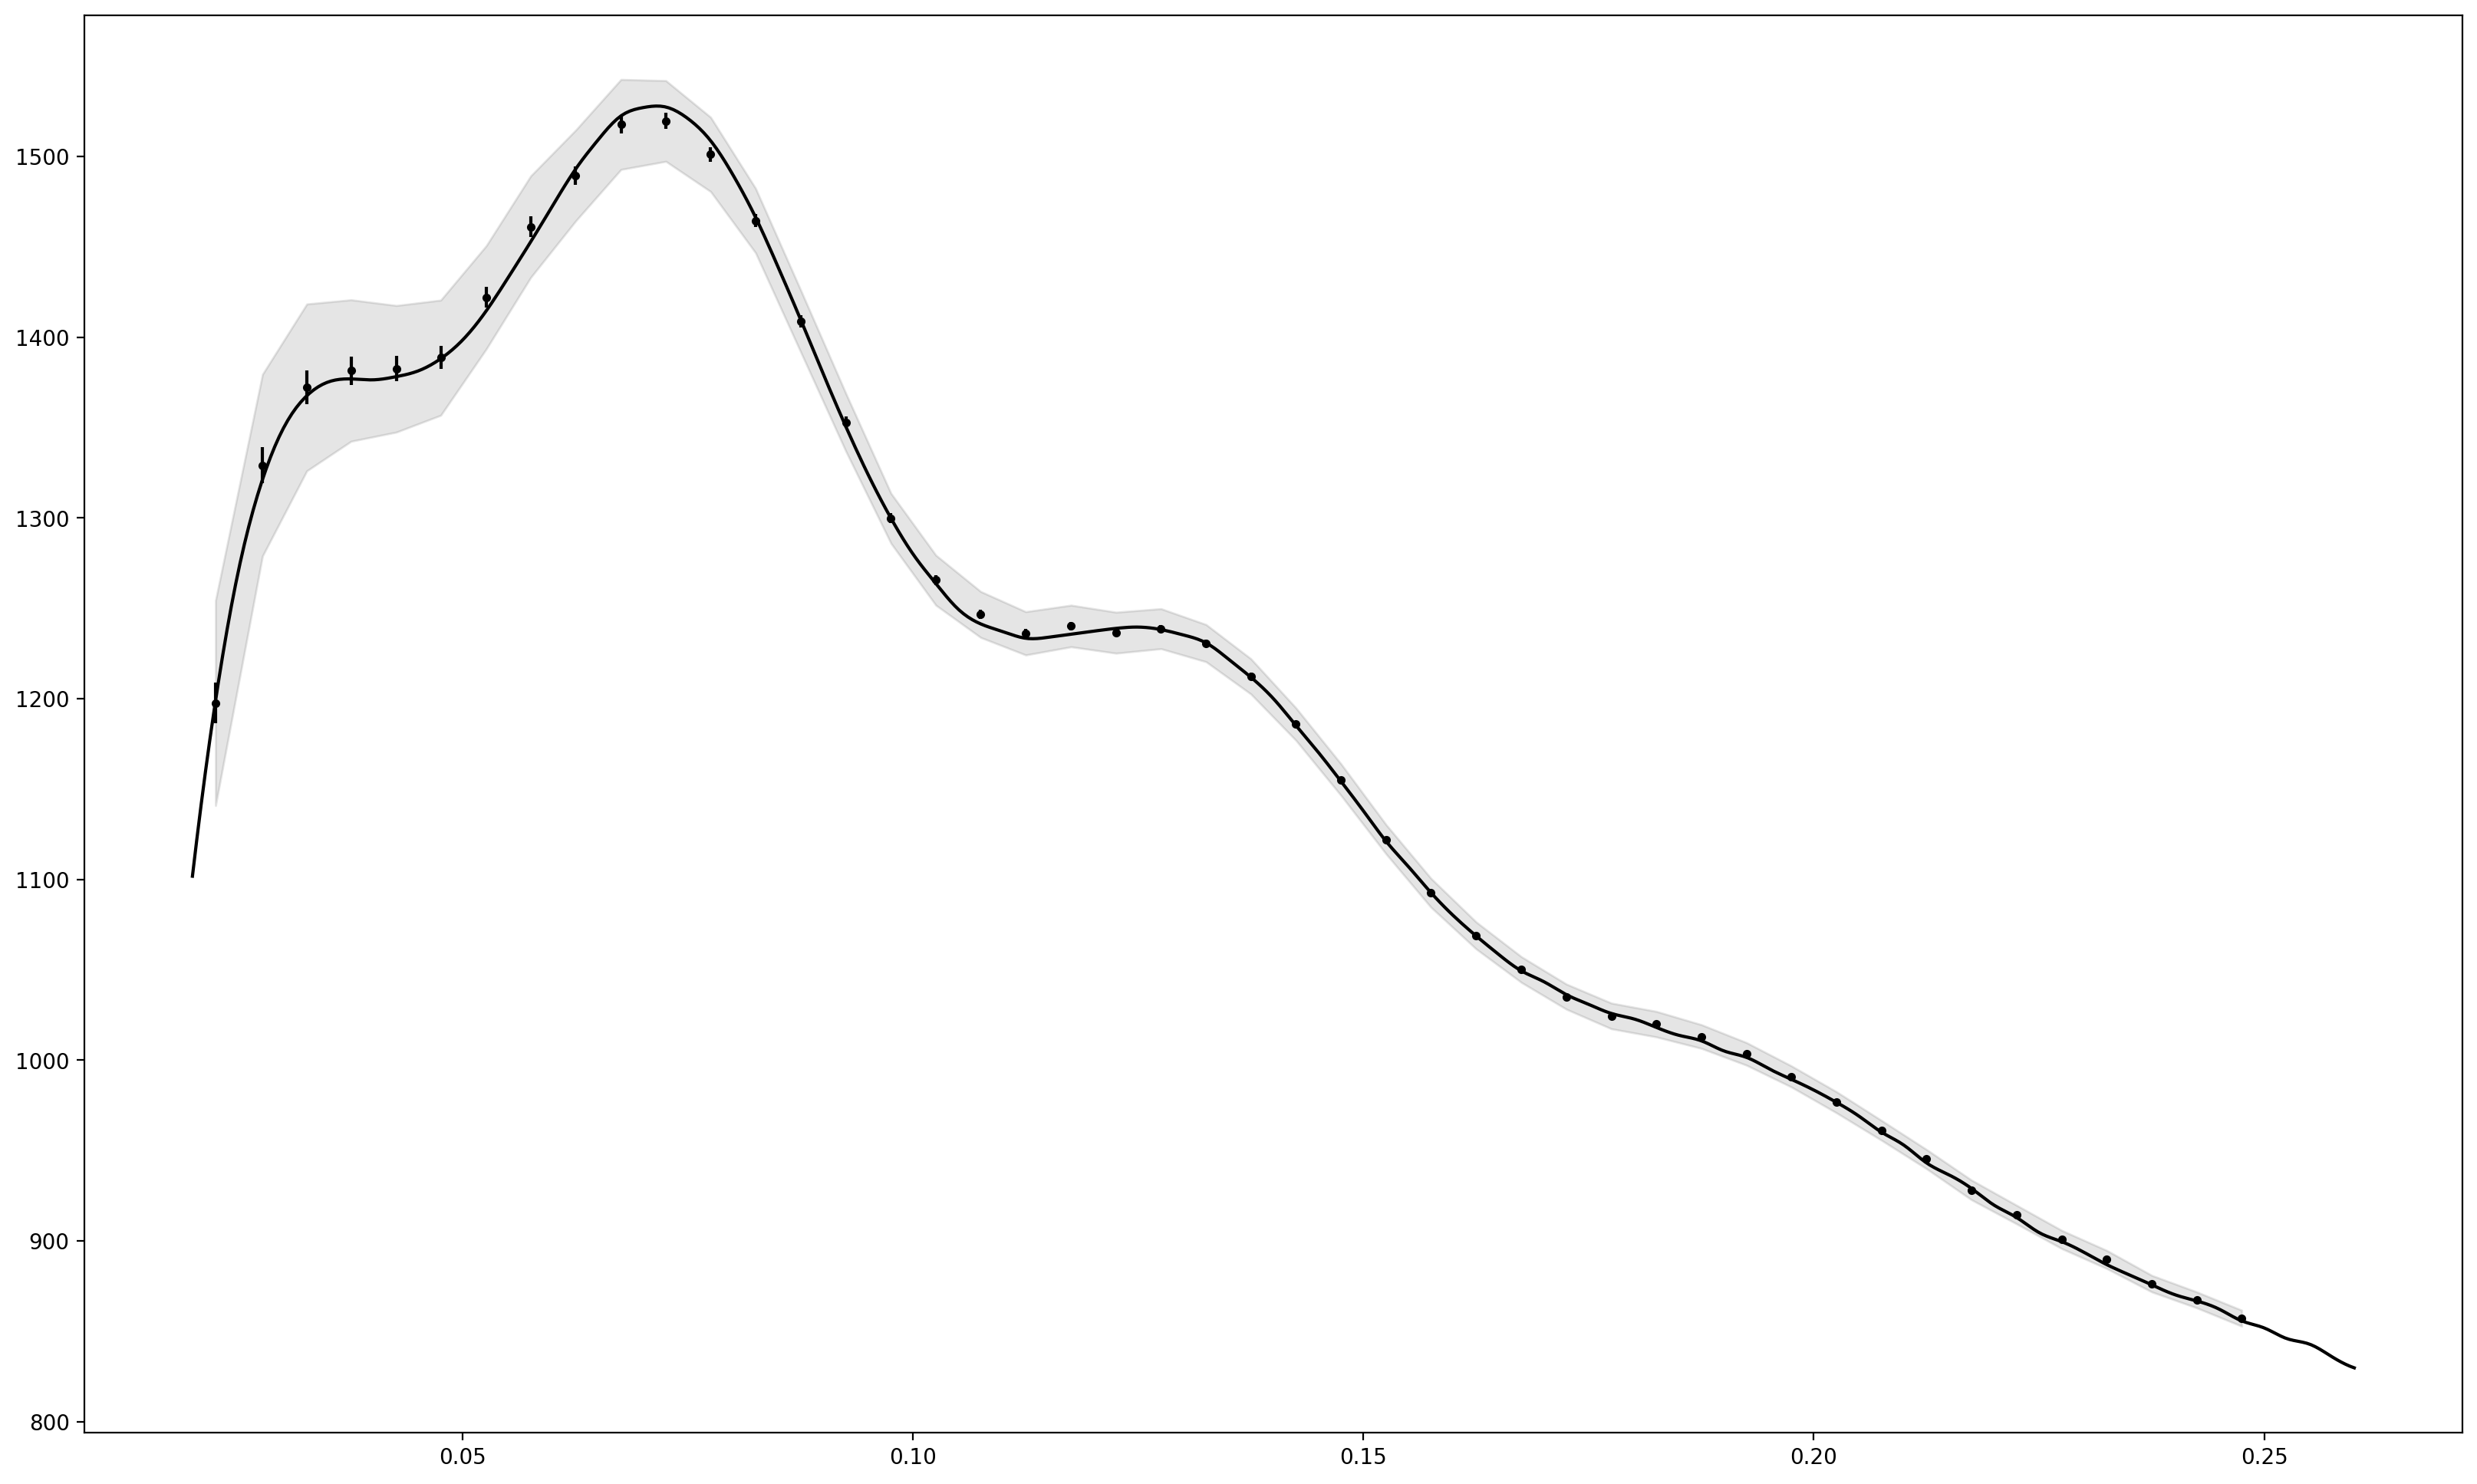

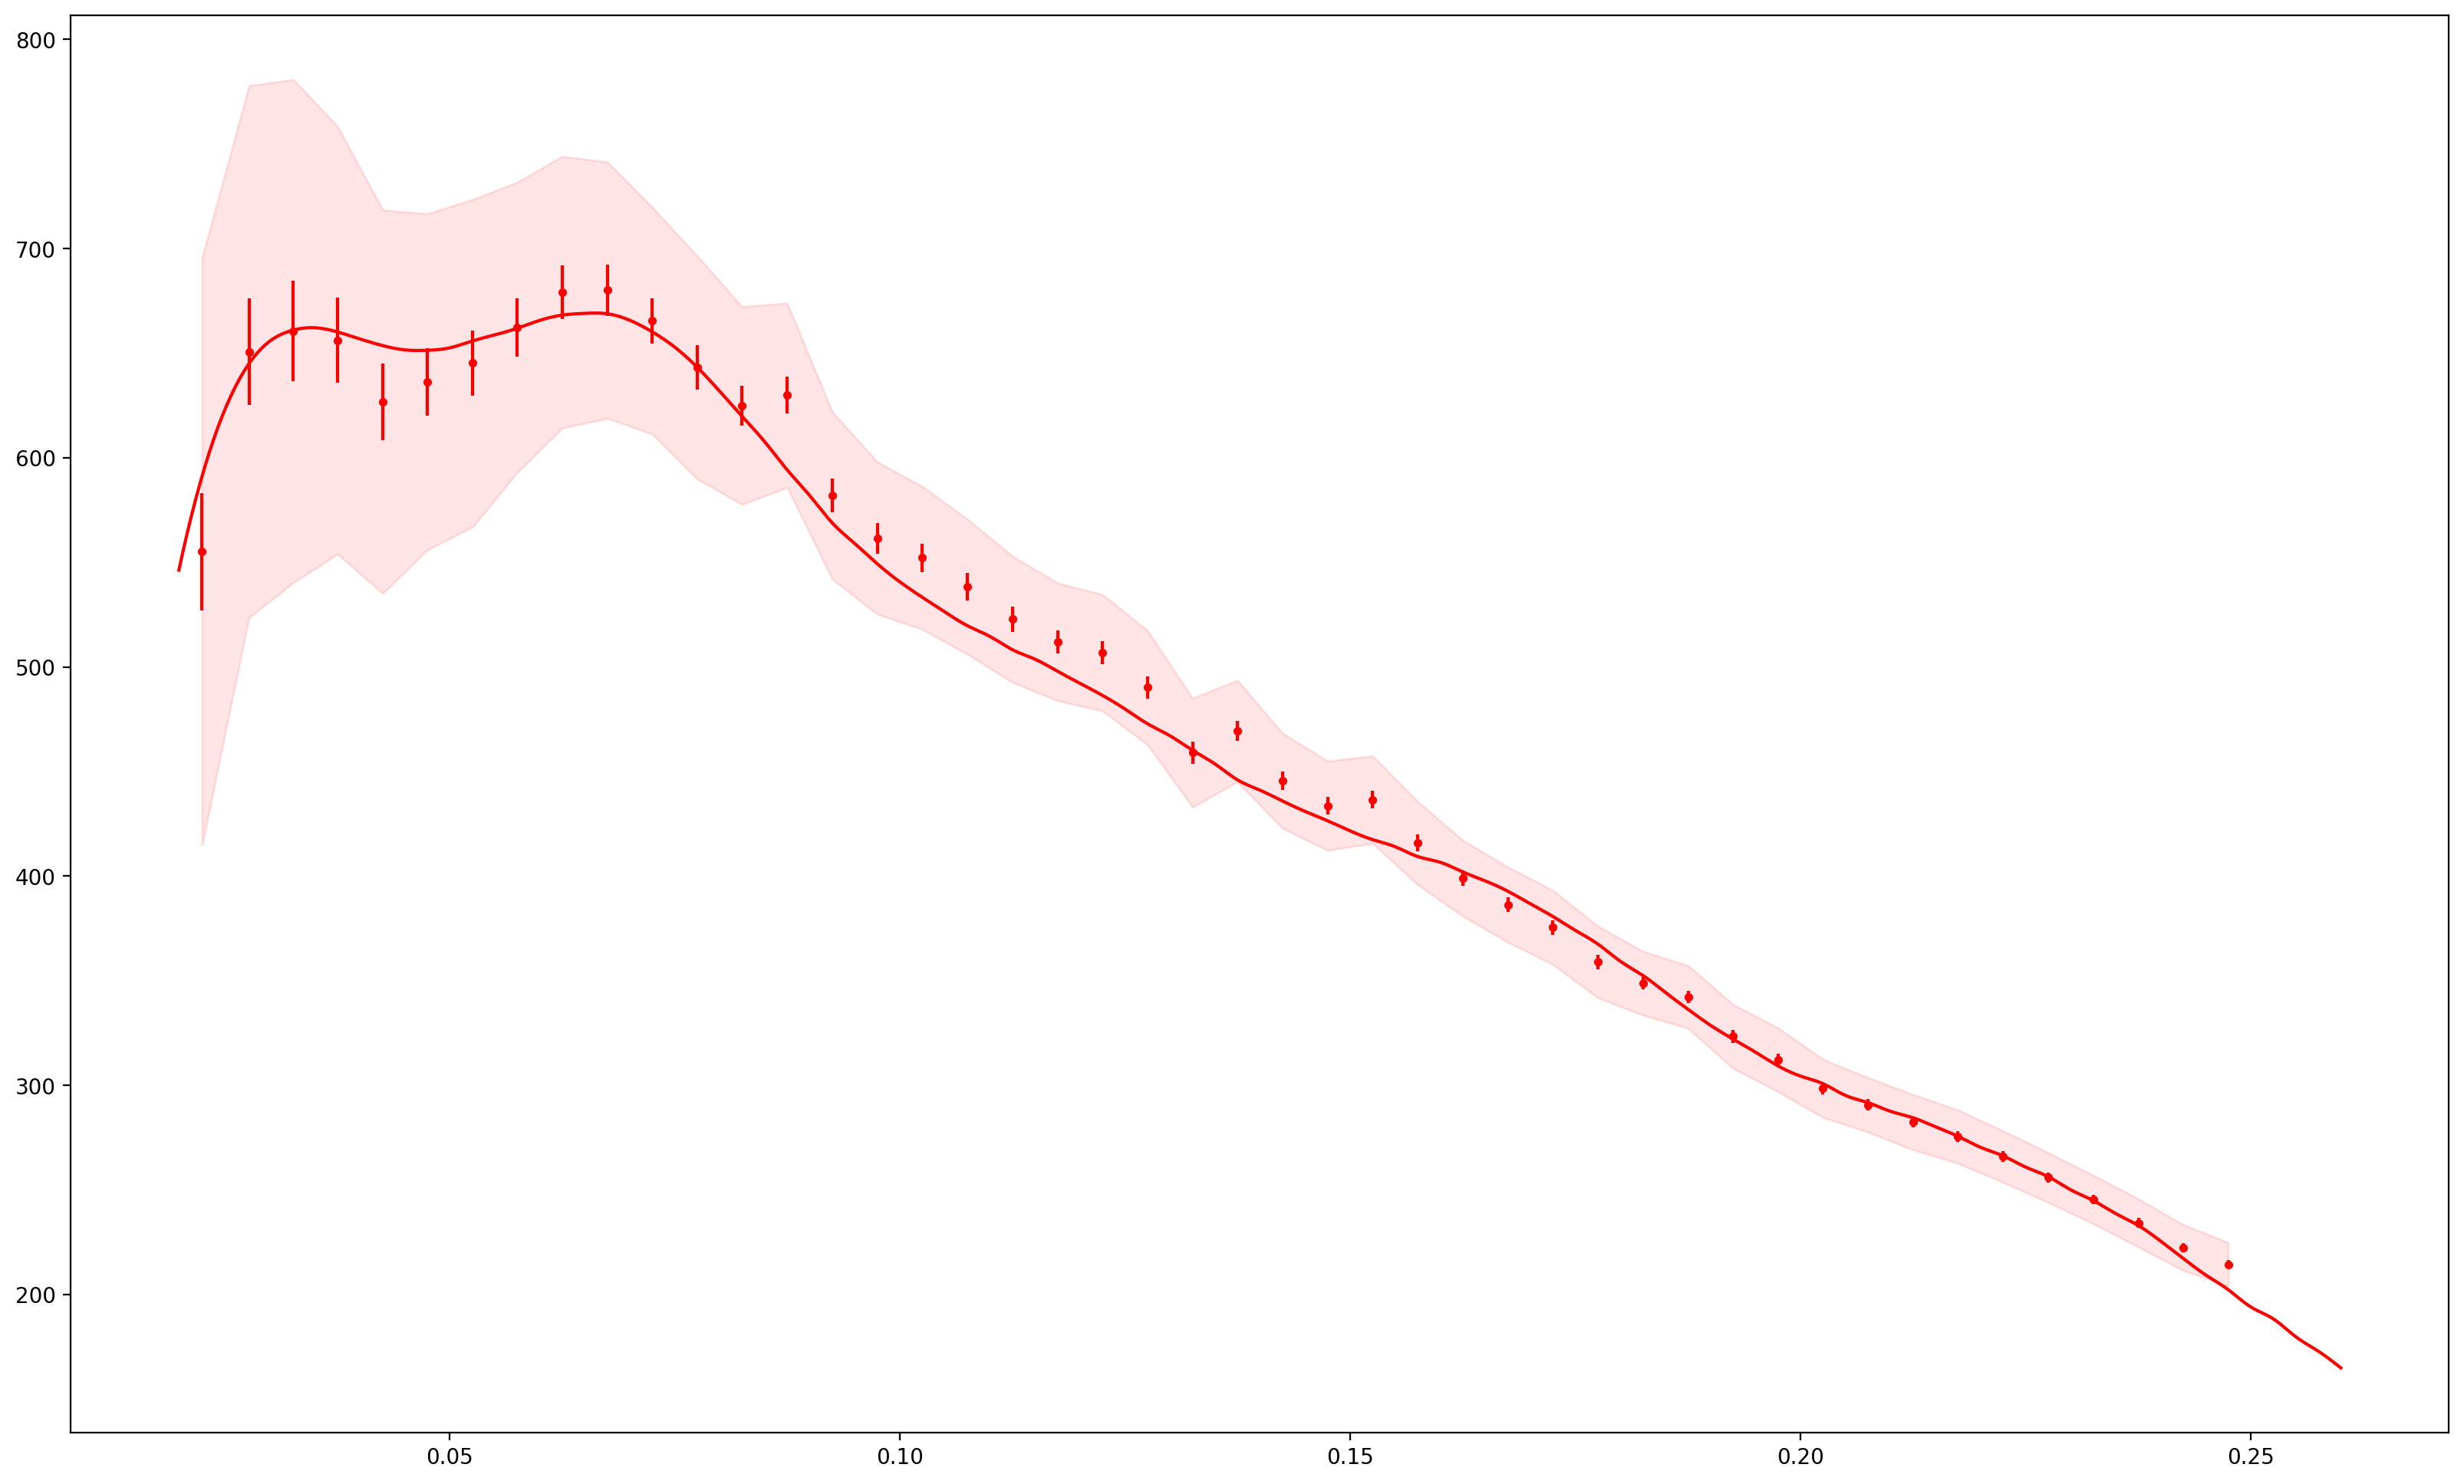

In [19]:
colors = {0:'k', 2:'r'}
for i in [0,2]:
    plt.plot(k_model, k_model*pk_model[i], color=colors[i])
    plt.errorbar(data[i][mask,0], data[i][mask,0]*data[i][mask,1], data[i][mask,0]*error[i]/5,
                 linestyle='', marker='.', color=colors[i])
    plt.fill_between(data[i][mask,0], data[i][mask,0]*(data[i][mask,1]-error[i]),
                     data[i][mask,0]*(data[i][mask,1]+error[i]),
                     color=colors[i], alpha=.1)
    plt.show()

In [ ]:
for i in [0,2]:
    plt.errorbar(data[i][mask,0], data[i][mask,0]*(data[i][mask,1]-pk_model_kdata[i]), data[i][mask,0]*error[i]/5,
    #plt.errorbar(data[i][mask,0], data[i][mask,1]-pk_model_kdata[i], error[i]/5,
                    linestyle='', marker='.', color=colors[i])
    plt.fill_between(data[i][mask,0], data[i][mask,0]*(-error[i]),
                     data[i][mask,0]*error[i],
    #plt.fill_between(data[i][mask,0], -error[i],
    #                 error[i],
                     color=colors[i], alpha=.1)
    plt.plot(data[i][mask,0], np.zeros_like(data[i][mask,0]), linestyle=':', color=colors[i])
    if i==0: plt.ylim(-20,20)
    else: plt.ylim(-50,50)
    plt.show()

In [ ]:
mapping_name_label = {'omega_cdm':'\omega_{cdm}',
                      'omega_b':'\omega_b',
                      'h':'h',
                      'ln10^{10}A_s':'\log(10^{10}A_s)',
                        'b1':'b_1', 
                      'b2': 'b_2', 
                      'bG2': 'b_{G_2}', 
                      'bGamma3': 'b_{\Gamma_3}', 
                      'c0': 'c_0', 
                      'c1': 'c_1', 
                      'c2': 'c_2', 
                      'ch': 'c_h', 
                      'Pshot': 'P_{shot}', 
                      'a0': 'a_0', 
                      'Bshot': 'B_{shot}',
                    'fnlequi': 'fnl_{equi}',
                    'fnlortho': 'fnl_{ortho}'}

In [ ]:
names = pk02_max_free_v25['params_fit_sorted']
labels =  [mapping_name_label[b] for b in names]

pk = MCSamples(samples=pk02_max_free_v25['sampler']['samples'], names = names, labels = labels, label='LRG')

In [ ]:
g = plots.get_subplot_plotter()
g.triangle_plot([pk], filled=True, markers=params)

In [ ]:
pk02_max_free_v25['max_a_posteriori']

In [ ]:
pk02_max_free_v25['mean']

In [ ]:
bb = ['b1','b2','bG2','bGamma3','c0','c1','ch','Pshot','a0',]
mean_params = {}
for cos in ['omega_cdm', 'omega_b', 'h', 'n_s', 'ln10^{10}A_s']:
    mean_params[cos] = pk02_max_free_v25['prior'][cos]['lim'][0]
for i,j in enumerate(bb):
    mean_params[j] = np.mean(pk02_max_free_v25['sampler']['samples'][3000:], axis=0)[i]

In [ ]:
print((np.max(pk02_max_free_v25['sampler']['samples'][2000:], axis=0)
      - np.min(pk02_max_free_v25['sampler']['samples'][2000:], axis=0))/200/pk02_max_free_v25['std'])

In [ ]:
pk02_max_free_v25['max_logposterior']

In [ ]:
for i,b in enumerate(bb):
    print(b, ' ', (pk02_max_free_v25['max_logposterior'][i]-pk02_max_free_v25['max_a_posteriori'][b])/pk02_max_free_v25['std'][i])

In [ ]:
import numpy as np

In [ ]:
np.__version__

In [20]:
params

{'omega_cdm': 0.12,
 'omega_b': 0.02237,
 'h': 0.6736,
 'n_s': 0.9649,
 'ln10^{10}A_s': 3.0364,
 'b1': 2.0210488,
 'b2': -0.8191925,
 'bG2': -1.3037415,
 'bGamma3': 2.3047802,
 'c0': 3.453676,
 'c1': 70.04486,
 'ch': 92.883385,
 'Pshot': -1.1198617,
 'a0': 6.690773}

In [7]:
pk02_max_free_v25['prior']

{'b1': {'type': 'Uni', 'lim': [0, 4]},
 'b2': {'type': 'Uni', 'lim': [-15, 15]},
 'bG2': {'type': 'Uni', 'lim': [-15, 15]},
 'bGamma3': {'type': 'Uni', 'lim': [-15, 15]},
 'c0': {'type': 'Uni', 'lim': [-1000, 1000]},
 'c1': {'type': 'Uni', 'lim': [-1000, 1000]},
 'c2': {'type': 'Fix', 'lim': 0},
 'ch': {'type': 'Uni', 'lim': [-1000, 1000]},
 'Pshot': {'type': 'Uni', 'lim': [-10, 10]},
 'a0': {'type': 'Uni', 'lim': [-10, 10]},
 'fnlequi': {'type': 'Fix', 'lim': 0},
 'fnlortho': {'type': 'Fix', 'lim': 0},
 'omega_cdm': {'type': 'Fix', 'lim': [0.12]},
 'omega_b': {'type': 'Fix', 'lim': [0.02237]},
 'h': {'type': 'Fix', 'lim': [0.6736]},
 'n_s': {'type': 'Fix', 'lim': [0.9649]},
 'ln10^{10}A_s': {'type': 'Fix', 'lim': [3.0364]}}